In [41]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [42]:
IMAGE_SIZE = [224, 224]

In [43]:
train_path = 'C:/Users/DCL/Desktop/final/Dataset/train'
valid_path = 'C:/Users/DCL/Desktop/final/Dataset/val'

In [44]:
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [45]:
for layer in mobilenet.layers:
  layer.trainable = False

In [46]:
folders = glob('C:/Users/DCL/Desktop/test1/Tomato_Dataset/train/*')

In [47]:
x = Flatten()(mobilenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [48]:
model = Model(inputs=mobilenet.input, outputs=prediction)

In [49]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [56]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [57]:
from keras.preprocessing.image import ImageDataGenerator

In [58]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [59]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [60]:

training_set = train_datagen.flow_from_directory('C:/Users/DCL/Desktop/final/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1086 images belonging to 10 classes.


In [61]:

test_set = test_datagen.flow_from_directory('C:/Users/DCL/Desktop/final/Dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 273 images belonging to 10 classes.


In [67]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\DCL\AppData\Local\Temp\ipykernel_8400\3565302307.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
34/34 [==============================] - 31s 918ms/step - loss: 0.0843 - accuracy: 0.9871 - val_loss: 1.6200 - val_accuracy: 0.9011
Epoch 2/5
34/34 [==============================] - 34s 1s/step - loss: 0.1730 - accuracy: 0.9834 - val_loss: 1.4951 - val_accuracy: 0.8938
Epoch 3/5
34/34 [==============================] - 38s 1s/step - loss: 0.1819 - accuracy: 0.9770 - val_loss: 2.4550 - val_accuracy: 0.8828
Epoch 4/5
34/34 [==============================] - 43s 1s/step - loss: 0.2565 - accuracy: 0.9742 - val_loss: 2.1568 - val_accuracy: 0.8864
Epoch 5/5
34/34 [==============================] - 36s 1s/step - loss: 0.2571 - accuracy: 0.9761 - val_loss: 2.0013 - val_accuracy: 0.9011


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


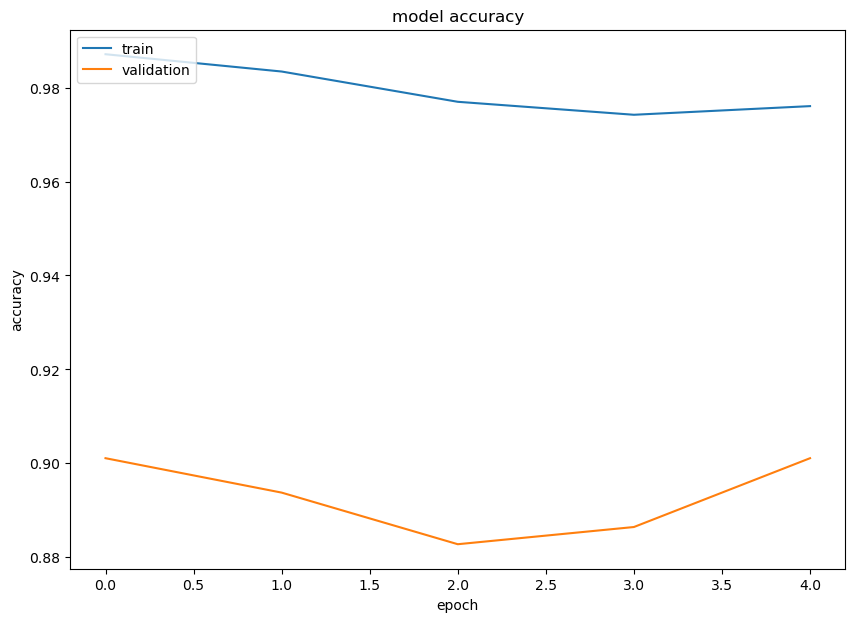

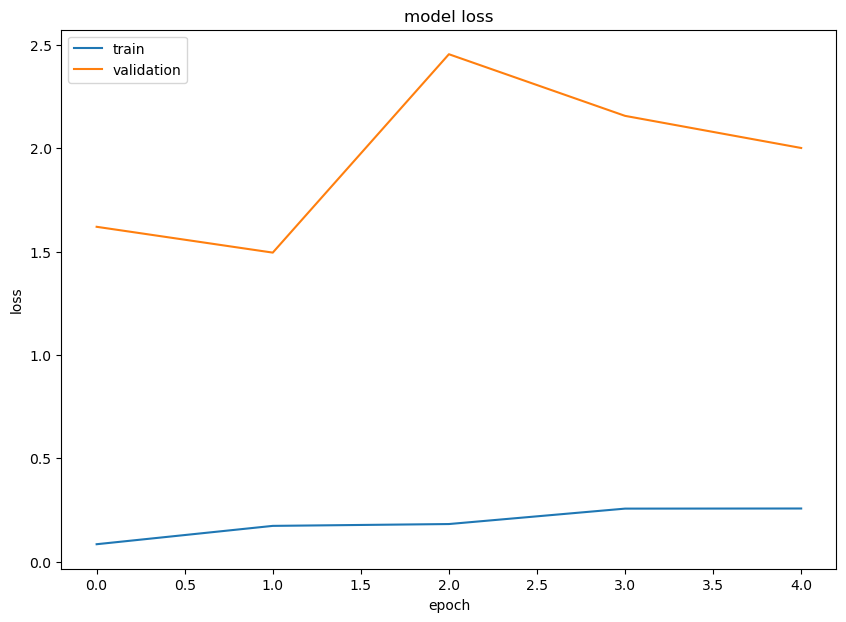

In [68]:
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()